In [1]:
file = 'bq-results-20220420-122600-1650457576684.xlsx'
N_clusters = 10

In [2]:
import os
import random
import re
import string

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
import numpy as np
import pandas as pd

from gensim.models import Word2Vec

from nltk import word_tokenize
from nltk.corpus import stopwords

from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

nltk.download("stopwords")

SEED = 42
random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import pandas as pd
df_raw = pd.read_excel(file,usecols=['comment'])
df_raw.head(5)

,comment
0,добавлю
1,Выбрала не то время
2,Половина заказа нет в наличии
3,NaN
4,NaN


In [5]:
df_raw['comment']=df_raw['comment'].apply(str)

In [6]:
import re
df_raw['comment'] = df_raw['comment'].apply(lambda x: re.sub('(?<! )(?=[.,!?()])|(?<=[1234567890.,!?()])(?! )', r' ', x))

In [7]:
pattern_punct = '[!@"“’«»#$%&\'()*+,—/:;<=>?^_`{|}~\[\]]'
df_raw['comment'] = df_raw['comment'].str.replace(pattern_punct,' ')

C:\Users\user\AppData\Local\Temp/ipykernel_22744/2800933685.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_raw['comment'] = df_raw['comment'].str.replace(pattern_punct,' ')


In [8]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [9]:
def stem_sent(string):
    str_list = string.lower().split()
    str_transform_list = []
    for i in str_list:
#         if type(i) == str:
        if i not in stop_words:
            str_transform_list.append(morph.parse(i)[0].normal_form)
#         else:
#             str_transform_list.append(' ')
#         print(i)
    return ' '.join(str_transform_list)

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words("russian"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
from nltk.stem import SnowballStemmer
snowball = SnowballStemmer(language="russian")
df_raw['comment'] = df_raw['comment'].apply(stem_sent)

In [12]:
docs = []

for i in range(len(df_raw)):
    docs.append(df_raw.iloc[i]['comment'])

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

def preprocessing(line):

    line = line.lower()
    line = re.sub(r"[{}]".format(string.punctuation), " ", line)
    return line

In [14]:
df = pd.read_excel(file)

In [15]:
tfidf_vectorizer = TfidfVectorizer(preprocessor=preprocessing)
tfidf = tfidf_vectorizer.fit_transform(docs)

kmeans = KMeans(n_clusters=N_clusters).fit(tfidf)

In [16]:
# lines_for_predicting = ["tf and idf is awesome!", "some androids is there"]
l = kmeans.predict(tfidf_vectorizer.transform(docs))

In [17]:
df_raw['clusters'] = l

In [18]:
# df_raw.to_excel('clusters.xlsx')

pd.concat((df_raw.rename(columns={'comment':'transformed_comment'}), df.drop('date', axis = 1)), axis = 1).to_excel('clusters.xlsx')

In [19]:
df_raw

,comment,clusters
0,добавить,9
1,выбрать время,1
2,половина заказ наличие,7
3,nan,0
4,nan,0
...,...,...
34099,nan,0
34100,nan,0
34101,nan,0
34102,nan,0


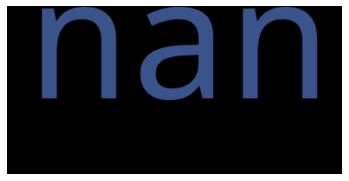

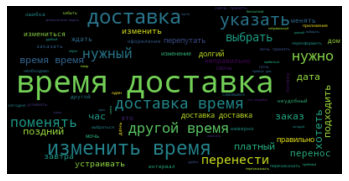

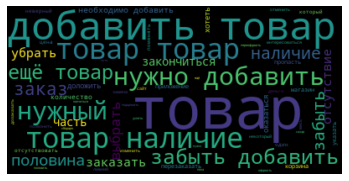

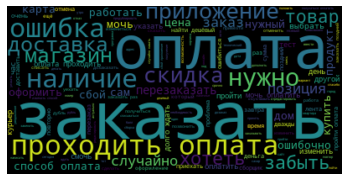

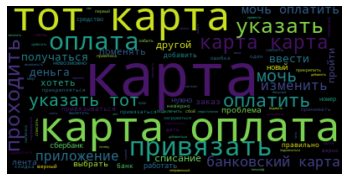

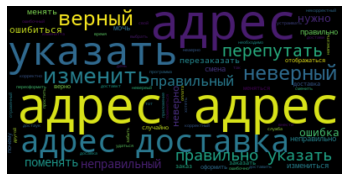

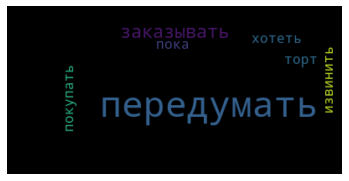

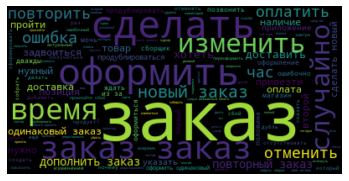

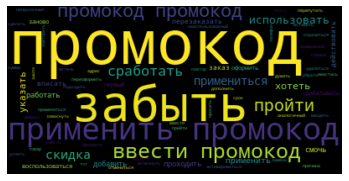

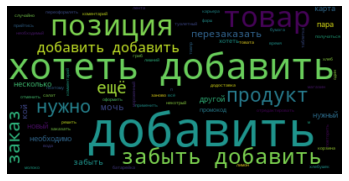

In [22]:
%matplotlib inline


for j in range(N_clusters):
    summ = ' '
    for i in range(len(df_raw[df_raw['clusters'] == j])):
        summ += df_raw[df_raw['clusters'] == j]['comment'].iloc[i] + ' '
    wordcloud = WordCloud().generate(summ)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordcloud.to_file(f'image{j}.png')


In [4]:
import sys

SyntaxError: invalid syntax (Temp/ipykernel_10592/2054956084.py, line 2)